---
# Predicción de Consumo Energético
---
**Autores:**  
- Costela Guijosa, Jose Luis  
- Sanchez Jimenez, Manuel  

**Fecha:**  
Enero de 2025

**Descripción:**  
Predicción de consumo energético.

**Contacto:**  
- joscosgui@alum.us.es  
- mansanjim1@alum.us.es

---
## Índice

1. Introducción

2. Análisis del dataset

3. Preprocesamiento y limpieza

4. Visualización

5. Transformación  
    + 5.1. Conversión de variables   
    + 5.2. Normalización  

6. Entrenamiento y evaluación del modelo (data mining)  
    + 6.1. División dataset entrenamiento-test  
    + 6.2. Ejecución de algoritmos de predicción  
        * 6.2.1. Regresión lineal  
        * 6.2.2. Árbol de decisión  
        * 6.2.3. Vecinos Más Cercanos (KNN)  
        * 6.2.4. XGBoost  
    + 6.3. Evaluación de modelos 
    + 6.4. Optimización de modelos  
    + 6.5. Modelos no optimizados vs optimizados  
    + 6.6. Feature Engineering

7. Conclusiones

---
## 1. Introducción

Este proyecto tiene como objetivo desarrollar un modelo de predicción del consumo energético utilizando técnicas de Machine Learning, basándose en un conjunto de datos que contiene información sobre condiciones ambientales, características del edificio y patrones de uso de energía.

Siguiendo las fases del proceso KDD (Knowledge Discovery in Databases), realizamos una serie de pasos que incluyen preprocesamiento y limpieza de datos, visualización, transformación de variables y modelado predictivo. En esta última fase, se aplican diversos algoritmos de aprendizaje supervisado, como Regresión Lineal, Árboles de Decisión y K-Neighbors Regressor (KNN), con el fin de encontrar el modelo que mejor prediga el consumo energético.

A través de este estudio, buscamos analizar las variables más influyentes en el consumo energético y evaluar la efectividad de distintos modelos para ofrecer una solución eficiente y precisa en la predicción del uso de energía.

---
## 2. Análisis del dataset

El conjunto de datos utilizado en este proyecto consta de 5000 registros y ha sido diseñado para el análisis y la predicción del consumo energético en función de diversas variables. Incluye información relacionada con la temporalidad, las condiciones ambientales, las características del edificio o local, el uso de sistemas eléctricos y la contribución de energía renovable. Además, recoge medidas de consumo energético de diferentes edificios y locales, junto con datos adicionales que permiten comprender mejor los factores que influyen en el consumo y facilitan la construcción de modelos de predicción más precisos. La variable objetivo, EnergyConsumption, representa el consumo total de energía registrado en una hora para cada una de las instancias.

Según la información proporcionada por el distribuidor del dataset, este combina datos reales (1000 instancias) con datos sintéticos generados artificialmente (4000 instancias). La generación de datos sintéticos se ha llevado a cabo preservando las propiedades estadísticas del conjunto original, con el objetivo de mejorar la robustez y precisión de los modelos de predicción desarrollados en este estudio.

El dataset posee los siguientes atributos:

+ Month: Variable numérica que representa el mes del año (1-12).

+ Hour: Variable numérica que representa la hora del día en la que se hizo la medida de energía consumida (0–23).

+ DayOfWeek: Variable categórica que indica el día de la semana en el que se hizo la medida de energía consumida.

+ Holiday: Variable categórica booleana que indica si la medida de energía consumida se realizó en un día de vacaciones/festivo.

+ Temperature: Variable numérica que representa la temperatura en grados Celsius.

+ Humidity: Variable numérica que muestra el nivel de humedad como porcentaje.

+ SquareFootage: Variable numérica que mide el área del local.

+ Occupancy: Variable numérica que representa el número de personas residentes en el local.

+ HVACUsage: Variable categórica que indica el uso de sistemas de calefacción, ventilación y aire acondicionado.

+ LightingUsage: Variable categórica que indica el uso de sistemas de iluminación.

+ RenewableEnergy: Variable numérica que representa la contribución porcentual de fuentes de energía renovables.

+ EnergyConsumption: Variable objetivo numérica que representa la energía total consumida.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

df = pd.read_csv('Data/Energy_consumption_dataset.csv')

Se realiza un análisis preliminar del dataframe para identificar los tipos de variables presentes en sus atributos

In [2]:
print("Información del dataframe:")
print(df.info(), "\n")

print("Primeras instancias del dataframe:")
print(df.head(), "\n")

print("Descripcion del dataframe:")
print(df.describe())

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None 

Primeras instancias del dataframe:
   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     

---
## 3. Preprocesamiento y limpieza

En esta fase se realiza la limpieza y preparación de los datos, eliminando valores nulos, transformando variables categóricas y asegurando la calidad del dataset. Este proceso es fundamental para garantizar que los modelos predictivos trabajen con datos consistentes y estructurados.

Se realiza una pequeña consulta por si existe algún dato faltante

In [3]:
print("Se revisa si existe algún dato faltante")
print(df.isnull().sum()) # Se comprueba que no existe ningún dato faltante
print("Observando las metricas anteriores se observa que no hay datos faltantes")

Se revisa si existe algún dato faltante
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64
Observando las metricas anteriores se observa que no hay datos faltantes


---

## 4.Visualización

En esta sección se han realizado diversos gráficos que ayudan a la comprensión y exploración de los datos. Para ello, se han utilizado gráficos como los histogramas o gráficos de barras, entre otros.
Gracias a los cuáles se pueden localizar patrones o problemas en los datos en una fase inicial, facilitando la toma de decisiones en el preprocesamiento


### Histograma de energia consumida.
A través de este histograma se observa como los datos de consumo eléctrico siguen una distribución similar
a una distribución normal centrada en un rango de 75 a 80 unidades.

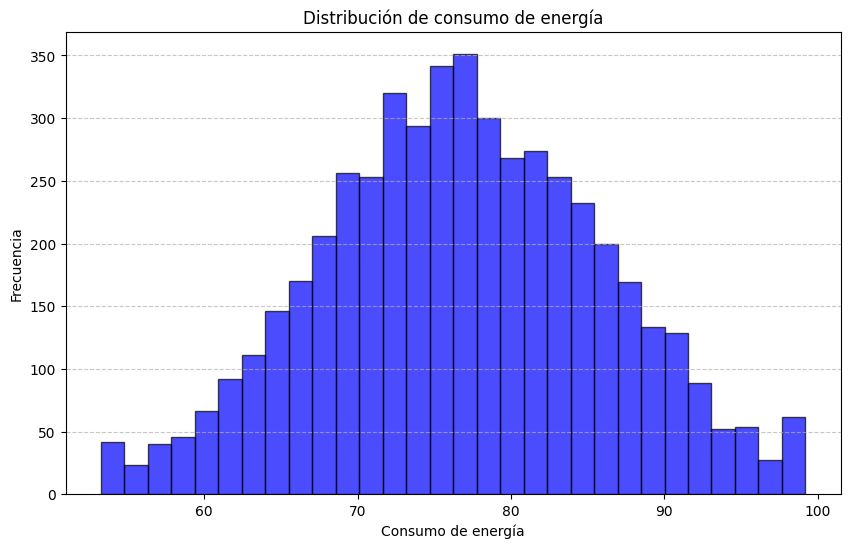

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['EnergyConsumption'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de consumo de energía')
plt.xlabel('Consumo de energía')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Consumo horario en vacaciones y no-vacaciones 

En días festivos, el consumo energético presenta un comportamiento más irregular, con picos durante la noche y una estructura diaria menos definida, lo que refleja horarios más flexibles. Por otro lado, en los días no festivos, se observan patrones más estructurados, con aumentos en horas laborales y de la tarde, mostrando rutinas más marcadas.

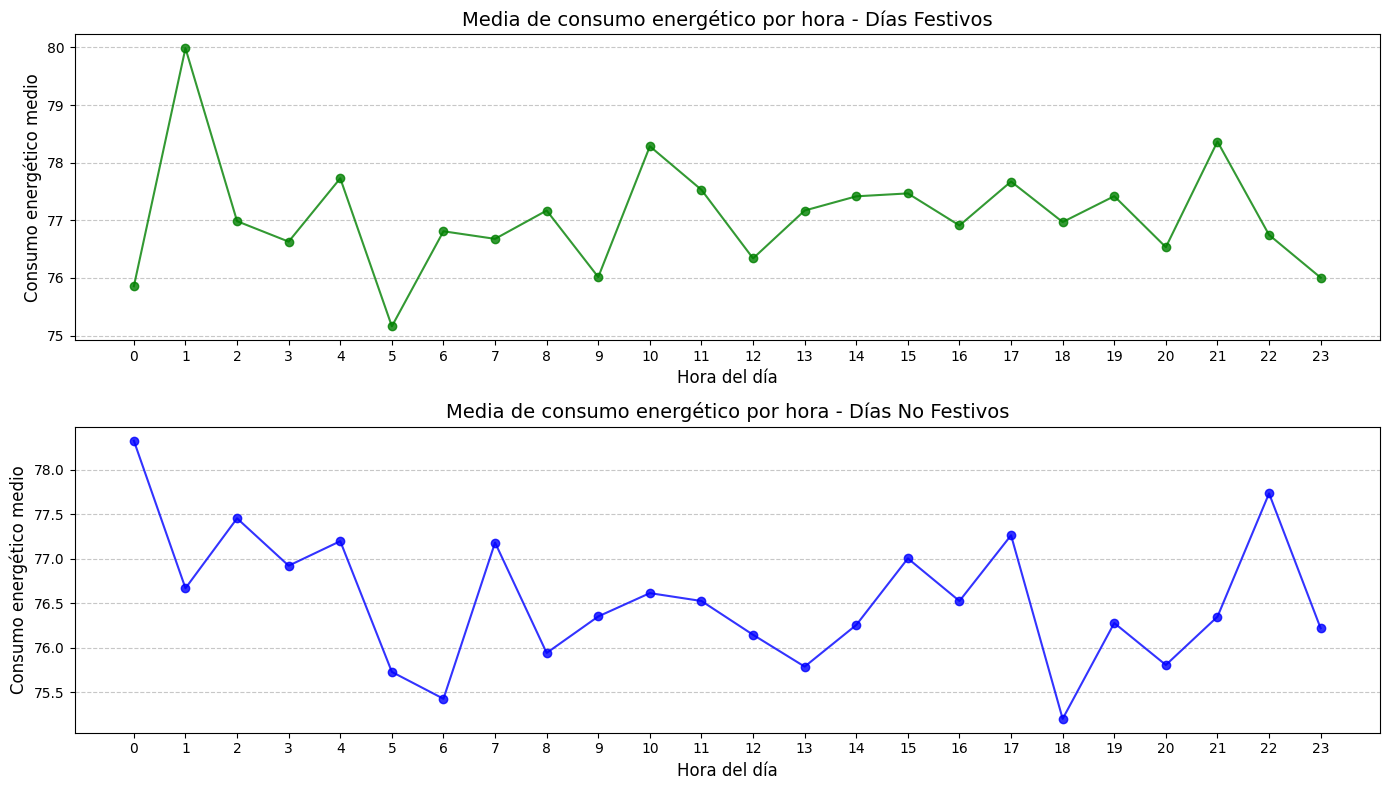

In [5]:
df_holiday = df[df['Holiday'] == 'Yes']
df_non_holiday = df[df['Holiday'] == 'No']

df_hourly_energy_holiday = df_holiday.groupby('Hour')['EnergyConsumption'].mean()
df_hourly_energy_non_holiday = df_non_holiday.groupby('Hour')['EnergyConsumption'].mean()

# Días festivos
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(df_hourly_energy_holiday.index, df_hourly_energy_holiday.values, marker='o', linestyle='-', color='green', alpha=0.8)
plt.title('Media de consumo energético por hora - Días Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Días no festivos
plt.subplot(2, 1, 2)
plt.plot(df_hourly_energy_non_holiday.index, df_hourly_energy_non_holiday.values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Media de consumo energético por hora - Días No Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### Consumo en los distintos dias de la semana

Durante los dias de la semana el consumo energético sigue una distribución relativamente uniforme a lo largo de los días, incluyendo los fines de semana. Esto sugiere que el consumo energético no varía drásticamente entre días laborales y fines de semana, posiblemente debido a un uso constante de los recursos energéticos independientemente del día.

DayOfWeek
Friday       77.103561
Monday       76.171877
Saturday     77.325581
Sunday       76.578337
Thursday     76.454205
Tuesday      77.210683
Wednesday    76.684472
Name: EnergyConsumption, dtype: float64
DayOfWeek
Monday       76.171877
Tuesday      77.210683
Wednesday    76.684472
Thursday     76.454205
Friday       77.103561
Saturday     77.325581
Sunday       76.578337
Name: EnergyConsumption, dtype: float64


/tmp/ipykernel_1498177/1449759358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')


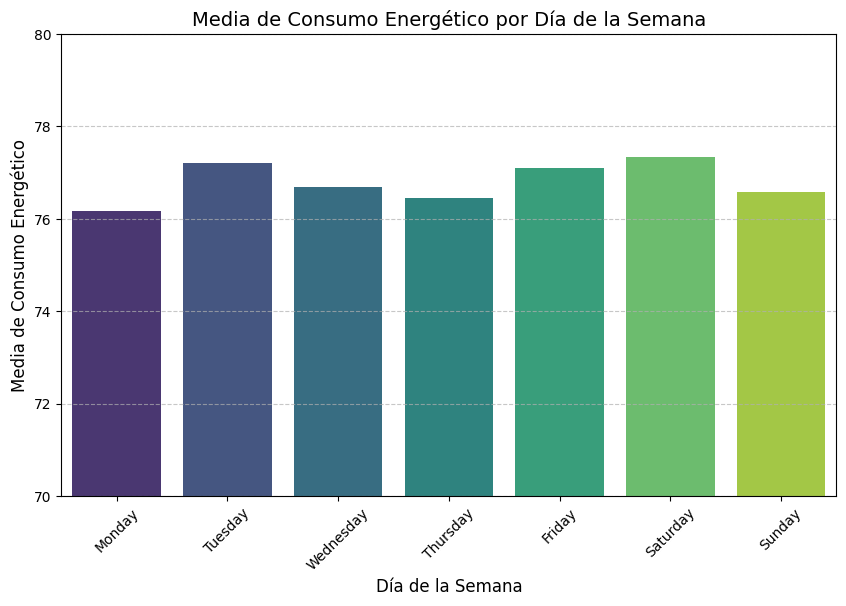

In [6]:
mean_consumption_by_day = df.groupby('DayOfWeek')['EnergyConsumption'].mean()
print(mean_consumption_by_day)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_consumption_by_day = mean_consumption_by_day.reindex(ordered_days)
print(mean_consumption_by_day)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')
plt.title('Media de Consumo Energético por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Consumo en las distintas estaciones del año

El análisis del consumo energético por estación del año muestra que este se mantiene relativamente estable, con solo ligeras variaciones entre estaciones. Aunque en invierno se observa un leve incremento en el consumo, las diferencias no son significativas, lo que indica un uso energético constante a lo largo del año, independientemente de la época.

In [7]:
def get_season(month):
    if month in [12, 1, 2]: 
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    elif month in [9, 10, 11]:
        return 'Otoño'

/tmp/ipykernel_1498177/1507089352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')


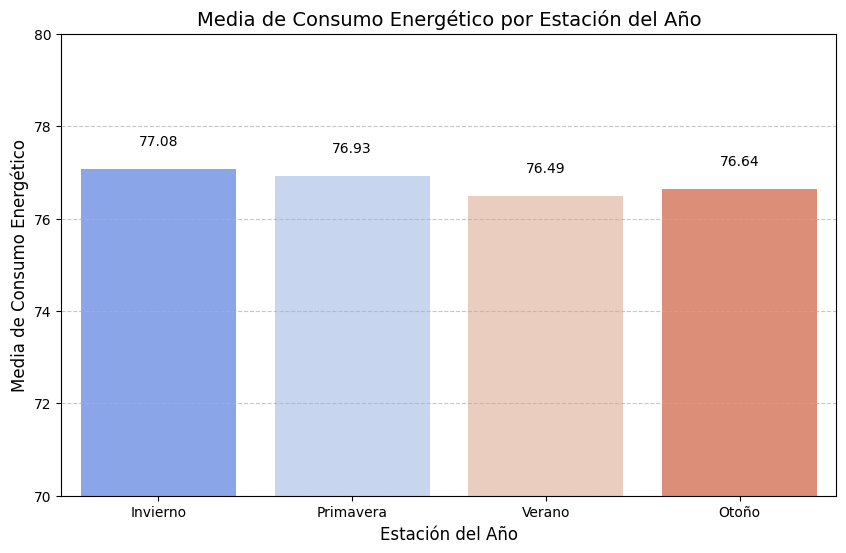

In [8]:
df['season'] = df['Month'].apply(get_season)

mean_consumption_by_season = df.groupby('season')['EnergyConsumption'].mean()

ordered_seasons = ['Invierno', 'Primavera', 'Verano', 'Otoño']
mean_consumption_by_season = mean_consumption_by_season.reindex(ordered_seasons)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')
plt.title('Media de Consumo Energético por Estación del Año', fontsize=14)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)

for index, value in enumerate(mean_consumption_by_season.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

df = df.drop(columns=['season'])

---
## 5. Transformación

Antes de entrenar los modelos de regresión, es necesario aplicar diversas transformaciones al dataset para garantizar un rendimiento óptimo. Entre estas transformaciones se incluyen la codificación de variables categóricas, convirtiéndolas en valores numéricos para que puedan ser interpretadas por los modelos, y la normalización o estandarización de las variables numéricas, asegurando que todas las características estén en una escala comparable y evitando que algunas dominen sobre otras en el proceso de aprendizaje. 

### 5.1. Conversión de variables

En primer lugar, la variable categórica DayOfWeek se ha convertido en una variable numérica de forma manual, permitiendo que el modelo interprete correctamente el orden secuencial de los días de la semana. Esto facilita la captura de posibles patrones temporales en la predicción del consumo energético. Además, se ha utilizado la función get_dummies para transformar otras variables categóricas en columnas binarias, asegurando que los modelos puedan procesarlas sin perder información relevante.

In [9]:
df['DayOfWeek'] = df['DayOfWeek'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

df = pd.get_dummies(df, columns=['Holiday', 'HVACUsage', 'LightingUsage'], drop_first=True)

print("Información del dataframe con la conversion de los datos realizados:")
print(df.info(), "\n")
print(df.head())

Información del dataframe con la conversion de los datos realizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   int64  
 3   Temperature        5000 non-null   float64
 4   Humidity           5000 non-null   float64
 5   SquareFootage      5000 non-null   float64
 6   Occupancy          5000 non-null   int64  
 7   RenewableEnergy    5000 non-null   float64
 8   EnergyConsumption  5000 non-null   float64
 9   Holiday_Yes        5000 non-null   bool   
 10  HVACUsage_On       5000 non-null   bool   
 11  LightingUsage_On   5000 non-null   bool   
dtypes: bool(3), float64(5), int64(4)
memory usage: 366.3 KB
None 

   Month  Hour  DayOfWeek  Temperature   Humidity  SquareFootage  Occupancy  \
0    

### 5.2. Normalizacion

En la etapa de normalización, diversas columnas numéricas tales como la temperatura o la humedad transforman sus valores para que tengan media 0 y desviación estándar 1, mejorando la capacidad del modelo para interpretar los datos sin verse afectado por diferentes escalas de magnitud.

In [10]:
colums_to_scaler = ['Temperature','Humidity','SquareFootage','RenewableEnergy']

scaler = StandardScaler()
df[colums_to_scaler] = scaler.fit_transform(df[colums_to_scaler])

---

## 6. Entrenamiento y evaluación del modelo (data mining)

Para la evaluación y entrenamiento del dataset, se ha dividido el conjunto de datos en dos subconjuntos: conjunto de entrenamiento y conjunto de prueba.

Posteriormente, se ha utilizado diversos modelos para la predicción, los cuales fueron optimizados con posterioridad con GridSearchCV, una técnica de búsqueda de hiperparámetros que explora diferentes combinaciones de parámetros.

Para evaluar el rendimiento del modelo, se han utilizado métricas como el Error Cuadrático Medio (MSE), que mide la diferencia promedio cuadrada entre los valores reales y predichos, y el Coeficiente de Determinación (R²), que indica qué tan bien se ajusta el modelo a los datos.

Por último, se han obtenido las variables más representativas y se han vuelto a ejecutar los modelos optimizados para comprobar si existe una diferencia significativa entre usar  el dataset completo o no.

### 6.1. División dataset entrenamiento - test

Se ha dividido el conjunto de datos en dos subconjuntos: conjunto de entrenamiento (80%) y conjunto de prueba (20%), utilizando la función train_test_split() de sklearn.

In [11]:
X=df.drop(columns=['EnergyConsumption'])
Y=df['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

### 6.2. Ejecución de algoritmos de predicción

En este apartado se lleva a cabo un análisis comparativo mediante la ejecución de distintos algoritmos de regresión, incluyendo Regresión Lineal, Árbol de Decisión, Vecinos Más Cercanos (KNN) y XGBoost. El objetivo es evaluar su desempeño en la predicción del consumo energético, identificando cuál de ellos ofrece mejores resultados en términos de precisión y ajuste a los datos.

#### 6.2.1. Regresión lineal

In [12]:
# Crear el modelo de Regresión Lineal
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - MSE:", mse_lr)
print("Regresión Lineal - R²:", r2_lr)

Regresión Lineal - MSE: 58.21965712118162
Regresión Lineal - R²: 0.33271002044784725


#### 6.2.2. Árbol de decisión

In [13]:
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión - MSE:", mse_tree)
print("Árbol de Decisión - R²:", r2_tree)

Árbol de Decisión - MSE: 62.61385781672854
Árbol de Decisión - R²: 0.2823454831546045


#### 6.2.3. Vecinos más cercanos (KNN)

In [14]:
model_knn = KNeighborsRegressor(n_neighbors=4)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN - MSE:", mse_knn)
print("KNN - R²:", r2_knn)

KNN - MSE: 78.45646747225369
KNN - R²: 0.10076394874117145


#### 6.2.4. XGBoost

In [15]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R²:", r2_xgb)

XGBoost - MSE: 58.37266808292848
XGBoost - R²: 0.33095627117167425


### 6.3. Evaluación de modelos

En este apartado se realiza una comparativa del rendimiento de los modelos entrenados previamente, evidenciando que, en general, los resultados obtenidos son bajos en todos los casos. Sin embargo, se observa que Regresión Lineal y XGBoost son los algoritmos que logran un mejor desempeño, mostrando un mayor ajuste a los datos en comparación con las demás técnicas implementadas.

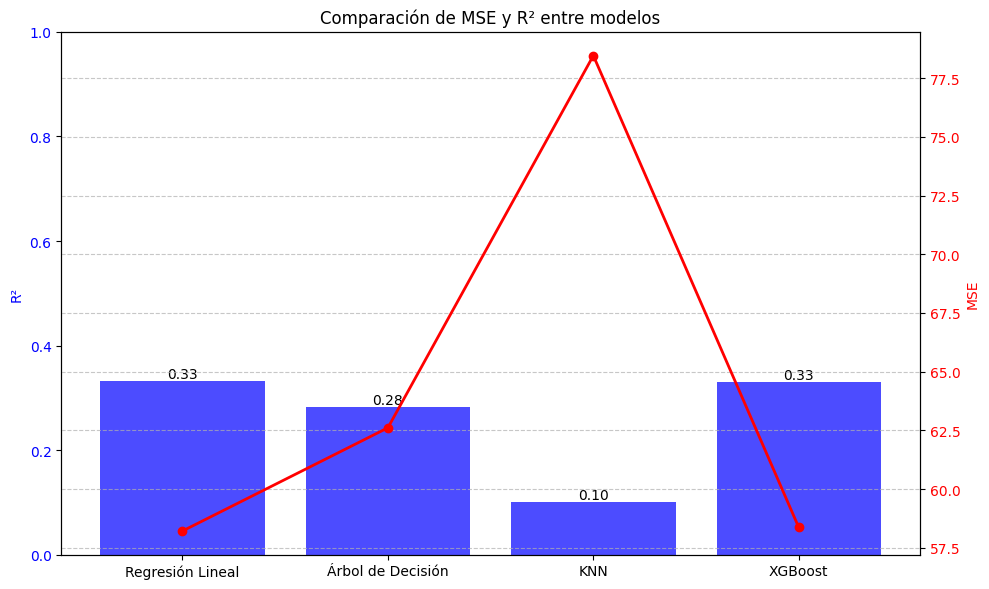

In [16]:
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
mse_values = [mse_lr, mse_tree, mse_knn, mse_xgb]
r2_values = [r2_lr, r2_tree, r2_knn, r2_xgb]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(models, r2_values, color='blue', alpha=0.7, label='R²')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)

for i, r2 in enumerate(r2_values):
    ax1.text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    
ax2 = ax1.twinx()
ax2.plot(models, mse_values, color='red', marker='o', label='MSE', linewidth=2)
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Comparación de MSE y R² entre modelos')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


### 6.4. Optimización de modelos

En este apartado se lleva a cabo una optimización de los hiperparámetros de cada modelo de regresión mediante técnicas de búsqueda, con el objetivo de mejorar su rendimiento.

Regresión Lineal con Hiper-parametros ajustados - MSE: 58.21965712118162
Regresión Lineal con Hiper-parametros ajustados - R²: 0.33271002044784725
Árbol de Decisión con Hiper-parametros ajustados- MSE: 62.518756431504734
Árbol de Decisión con Hiper-parametros ajustados- R²: 0.28343549646865207
K-Nearest Neighbors con Hiper-parametros ajustados - MSE: 69.24514036614777
K-Nearest Neighbors con Hiper-parametros ajustados - R²: 0.20634042548832365
XGBoost con Hiper-parametros ajustados - MSE: 57.83856589939559
XGBoost con Hiper-parametros ajustados - R²: 0.33707793269892417


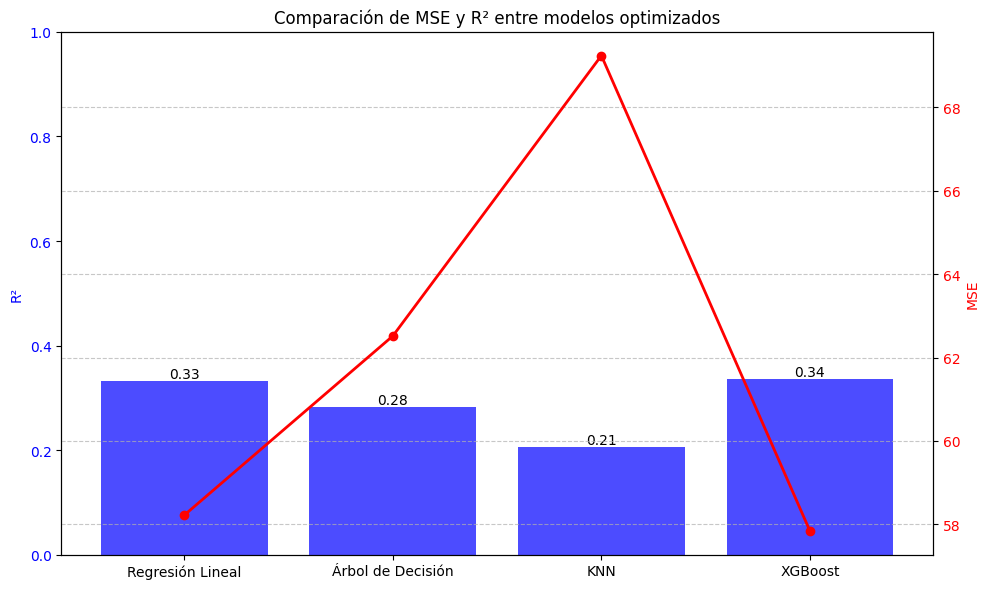

In [17]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

param_grid_tree = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

grid_search_lr.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
best_tree = grid_search_tree.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

y_pred_lr_gs = best_lr.predict(X_test)
y_pred_tree_gs = best_tree.predict(X_test)
y_pred_knn_gs = best_knn.predict(X_test)
y_pred_xgb_gs = best_xgb.predict(X_test)

r2_lr_gs = r2_score(y_test, y_pred_lr_gs)
r2_tree_gs = r2_score(y_test, y_pred_tree_gs)
r2_knn_gs = r2_score(y_test, y_pred_knn_gs)
r2_xgb_gs = r2_score(y_test, y_pred_xgb_gs)

mse_values = [
    mean_squared_error(y_test, y_pred_lr_gs),
    mean_squared_error(y_test, y_pred_tree_gs),
    mean_squared_error(y_test, y_pred_knn_gs),
    mean_squared_error(y_test, y_pred_xgb_gs)
]

print("Regresión Lineal con Hiper-parametros ajustados - MSE:", mse_values[0])
print("Regresión Lineal con Hiper-parametros ajustados - R²:", r2_lr_gs)
print("Árbol de Decisión con Hiper-parametros ajustados- MSE:", mse_values[1])
print("Árbol de Decisión con Hiper-parametros ajustados- R²:", r2_tree_gs)
print("K-Nearest Neighbors con Hiper-parametros ajustados - MSE:", mse_values[2])
print("K-Nearest Neighbors con Hiper-parametros ajustados - R²:", r2_knn_gs)
print("XGBoost con Hiper-parametros ajustados - MSE:", mse_values[3])
print("XGBoost con Hiper-parametros ajustados - R²:", r2_xgb_gs)

r2_values = [
    r2_score(y_test, y_pred_lr_gs),
    r2_score(y_test, y_pred_tree_gs),
    r2_score(y_test, y_pred_knn_gs),
    r2_score(y_test, y_pred_xgb_gs)
]

models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(models, r2_values, color='blue', alpha=0.7, label='R²')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)
for i, r2 in enumerate(r2_values):
    ax1.text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')

ax2 = ax1.twinx()
ax2.plot(models, mse_values, color='red', marker='o', label='MSE', linewidth=2)
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Comparación de MSE y R² entre modelos optimizados')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6.5. Modelos no optimizados vs optimizados

Se realiza una comparación entre los modelos optimizados y no optimizados. Se observa una mejora notable en KNN, mientras que en Regresión Lineal, Árbol de Decisión y XGBoost la optimización ha generado solo ligeras variaciones en el rendimiento.

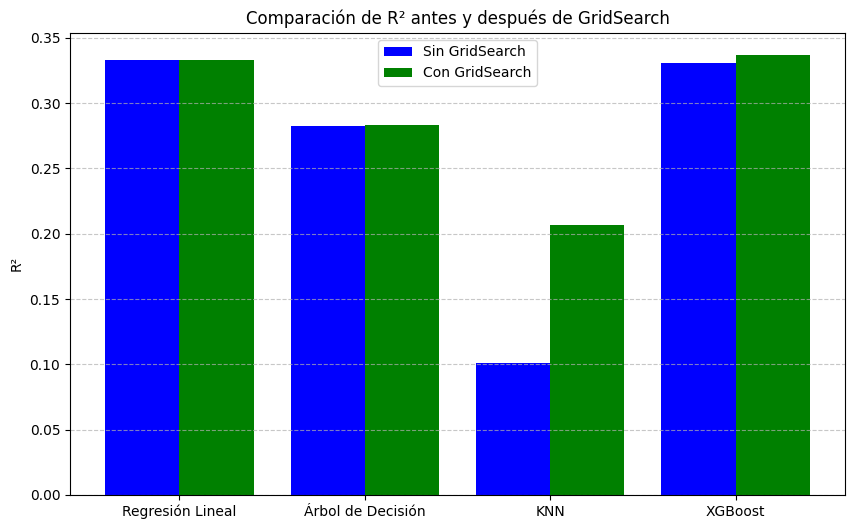

In [18]:
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
r2_before = [r2_lr, r2_tree, r2_knn, r2_xgb]
r2_after = [r2_lr_gs, r2_tree_gs, r2_knn_gs, r2_xgb_gs]

x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, r2_before, width=0.4, label='Sin GridSearch', color='blue', align='center')
plt.bar([p + 0.4 for p in x], r2_after, width=0.4, label='Con GridSearch', color='green', align='center')
plt.xticks([p + 0.2 for p in x], models)
plt.ylabel('R²')
plt.title('Comparación de R² antes y después de GridSearch')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6.6. Feature Engineering

En esta sección se aplica Feature Engineering para mejorar el rendimiento de los modelos mediante la selección de las 10 características más relevantes con SelectKBest y f_regression. Posteriormente, se entrenan los modelos optimizados con este subconjunto de variables y se comparan los resultados con el rendimiento obtenido usando todas las características.

Mejores 1 características seleccionadas: Index(['Temperature'], dtype='object')
Mejores 2 características seleccionadas: Index(['Temperature', 'Occupancy'], dtype='object')
Mejores 3 características seleccionadas: Index(['Temperature', 'Occupancy', 'HVACUsage_On'], dtype='object')
Mejores 4 características seleccionadas: Index(['Temperature', 'Occupancy', 'RenewableEnergy', 'HVACUsage_On'], dtype='object')
Mejores 5 características seleccionadas: Index(['Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy',
       'HVACUsage_On'],
      dtype='object')
Mejores 6 características seleccionadas: Index(['Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy',
       'Holiday_Yes', 'HVACUsage_On'],
      dtype='object')
Mejores 7 características seleccionadas: Index(['DayOfWeek', 'Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy',
       'Holiday_Yes', 'HVACUsage_On'],
      dtype='object')


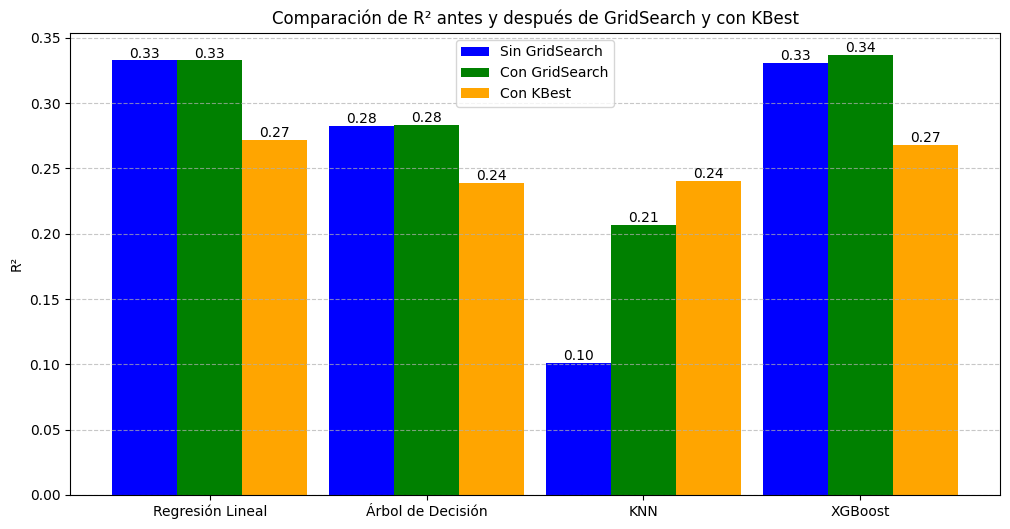

Mejores 8 características seleccionadas: Index(['Hour', 'DayOfWeek', 'Temperature', 'Humidity', 'Occupancy',
       'RenewableEnergy', 'Holiday_Yes', 'HVACUsage_On'],
      dtype='object')
Mejores 9 características seleccionadas: Index(['Hour', 'DayOfWeek', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'RenewableEnergy', 'Holiday_Yes', 'HVACUsage_On'],
      dtype='object')
Mejores 10 características seleccionadas: Index(['Month', 'Hour', 'DayOfWeek', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'RenewableEnergy', 'Holiday_Yes',
       'HVACUsage_On'],
      dtype='object')
Mejores 11 características seleccionadas: Index(['Month', 'Hour', 'DayOfWeek', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'RenewableEnergy', 'Holiday_Yes',
       'HVACUsage_On', 'LightingUsage_On'],
      dtype='object')


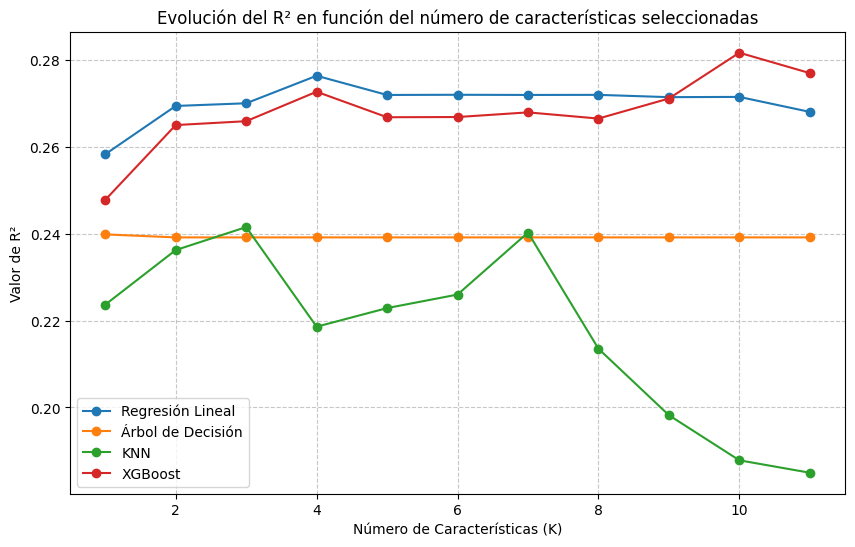

In [19]:
k_values_selected = []
k_values = range(1, 12)

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, Y)

    selected_features = X.columns[selector.get_support()]
    print(f'Mejores {k} características seleccionadas:', selected_features)

    X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_df, Y, test_size=0.20, random_state=42)

    grid_search_lr_sel = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
    grid_search_tree_sel = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='r2')
    grid_search_knn_sel = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
    grid_search_xgb_sel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, cv=5, scoring='r2')

    grid_search_lr_sel.fit(X_train_sel, y_train_sel)
    grid_search_tree_sel.fit(X_train_sel, y_train_sel)
    grid_search_knn_sel.fit(X_train_sel, y_train_sel)
    grid_search_xgb_sel.fit(X_train_sel, y_train_sel)

    best_lr_sel = grid_search_lr_sel.best_estimator_
    best_tree_sel = grid_search_tree_sel.best_estimator_
    best_knn_sel = grid_search_knn_sel.best_estimator_
    best_xgb_sel = grid_search_xgb_sel.best_estimator_

    y_pred_lr_sel = best_lr_sel.predict(X_test_sel)
    y_pred_tree_sel = best_tree_sel.predict(X_test_sel)
    y_pred_knn_sel = best_knn_sel.predict(X_test_sel)
    y_pred_xgb_sel = best_xgb_sel.predict(X_test_sel)

    r2_lr_sel = r2_score(y_test_sel, y_pred_lr_sel)
    r2_tree_sel = r2_score(y_test_sel, y_pred_tree_sel)
    r2_knn_sel = r2_score(y_test_sel, y_pred_knn_sel)
    r2_xgb_sel = r2_score(y_test_sel, y_pred_xgb_sel)

    models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
    r2_before = [r2_lr, r2_tree, r2_knn, r2_xgb]
    r2_after = [r2_lr_gs, r2_tree_gs, r2_knn_gs, r2_xgb_gs]

    r2_values_selected = [r2_lr_sel, r2_tree_sel, r2_knn_sel, r2_xgb_sel]
    k_values_selected.append(r2_values_selected)

    if k == 7: # Se observa que para k=7 tenemos el mejor rendimiento general en los 4 modelos
        x = range(len(models))
        plt.figure(figsize=(12, 6))

        plt.bar(x, r2_before, width=0.3, label='Sin GridSearch', color='blue', align='center')
        plt.bar([p + 0.3 for p in x], r2_after, width=0.3, label='Con GridSearch', color='green', align='center')
        plt.bar([p + 0.6 for p in x], r2_values_selected, width=0.3, label='Con KBest', color='orange', align='center')

        plt.xticks([p + 0.3 for p in x], models)
        plt.ylabel('R²')
        plt.title('Comparación de R² antes y después de GridSearch y con KBest')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        for i, (before, after, selected) in enumerate(zip(r2_before, r2_after, r2_values_selected)):
            plt.text(i, before, f'{before:.2f}', ha='center', va='bottom', fontsize=10, color='black')
            plt.text(i + 0.3, after, f'{after:.2f}', ha='center', va='bottom', fontsize=10, color='black')
            plt.text(i + 0.6, selected, f'{selected:.2f}', ha='center', va='bottom', fontsize=10, color='black')

        plt.show()

r2_values_selected = np.array(k_values_selected)

models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']

plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.plot(k_values, r2_values_selected[:, i], marker='o', label=model)

plt.xlabel('Número de Características (K)')
plt.ylabel('Valor de R²')
plt.title('Evolución del R² en función del número de características seleccionadas')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

---
## 7. Conclusiones

Los resultados obtenidos en este estudio indican que el dataset utilizado no permite una buena capacidad predictiva, lo que se refleja en los valores bajos de R² y altos de MSE en todos los modelos probados. Suponemos que esto se debe a que la mayoría de los datos provienen de generación sintética (4000 de las 5000 instancias), lo que sugiere que el proceso de creación de estos datos no logró capturar correctamente las relaciones reales entre las variables.

A lo largo del proyecto, se han explorado distintas estrategias para mejorar la precisión de los modelos, incluyendo ajuste de hiperparámetros con GridSearchCV y selección de características con Feature Engineering, pero ninguna de estas técnicas ha logrado obtener una mejora significativa en la predicción. Estos resultados indican que la calidad del dataset es un factor limitante en el desempeño de los modelos, y que para obtener mejores predicciones sería necesario trabajar con un conjunto de datos más fiable y representativo de la realidad.